# Homework 7, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/).

Some of the questions get kind of weird in this one, especially later on. **Feel free to lean on ChatGPT for the crazier ones!** It might be an interesting exploration of how to ask problems or explain what your dataset looks like.

## Do your importing and your setup

In [258]:
import pandas as pd
pd.set_option('display.max_rows', None)

import matplotlib.pyplot as plt

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [296]:
file = pd.read_excel("/Users/anushasubramanian/Desktop/07-homework/02-dogs/NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx", nrows = 30000, 
                     na_values=["Unknown","UNKNOWN","Dog Name Not Provided", "unknown", "NaN"])
dogs = pd.DataFrame(file)
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [297]:
#rows
len(dogs)

30000

In [298]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Owner Zip Code          30000 non-null  int64         
 1   Animal Name             29397 non-null  object        
 2   Animal Gender           30000 non-null  object        
 3   Primary Breed           25223 non-null  object        
 4   Secondary Breed         3971 non-null   object        
 5   Animal Dominant Color   29885 non-null  object        
 6   Animal Secondary Color  20946 non-null  object        
 7   Animal Third Color      6629 non-null   object        
 8   Animal Birth            30000 non-null  datetime64[ns]
 9   Spayed or Neut          30000 non-null  object        
 10  Guard or Trained        19826 non-null  object        
 11  Vaccinated              30000 non-null  object        
 12  Application Date        30000 non-null  dateti

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

Each row describes one pet dog. 

```Animal Gender``` is the gender of the pet dog 

```Vaccinated``` is whether the pet dog has received the mandated vaccinations or not

# Your thoughts

Think of three questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

#### Questions

1. What year did NYC residents get/adopt the most pets? (license date)
2. Is there a neighborhood/zipcode with the most 'colorful' dogs? (coat color)
3. Does the affluence of a neighborhood influence the breeds of dogs that they keep? (zipcode/breeds)

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

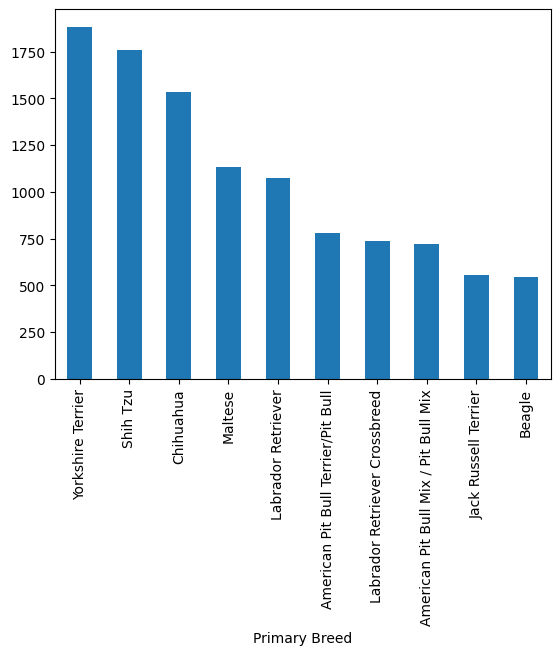

In [299]:
dogs["Primary Breed"].value_counts().sort_values(ascending = False).head(10).plot(kind = "bar");

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [300]:
# I included Unknown in the na_values list so it didn't get included in the top graph I created above

## What are the most popular dog names?

In [301]:
#top 10 most popular dog names in NYC
dogs["Animal Name"].value_counts().head(10)

Animal Name
Max        202
Bella      193
Charlie    172
Lola       146
Rocky      140
Lucy       128
Coco       114
Buddy      113
Lucky      106
Daisy       90
Name: count, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [302]:
dogs[dogs["Animal Name"] == "Anusha"] #no dogs have my name

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date


In [303]:
max_like_names = ["Max", "Maxwell"]
dogs[dogs["Animal Name"].isin(max_like_names)]["Animal Name"].value_counts()

Animal Name
Max        202
Maxwell     11
Name: count, dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [304]:
dogs["Guard or Trained"].value_counts(normalize=True) * 100

Guard or Trained
No     99.914254
Yes     0.085746
Name: proportion, dtype: float64

## What are the actual numbers?

In [305]:
dogs["Guard or Trained"].value_counts()

Guard or Trained
No     19809
Yes       17
Name: count, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [306]:
dogs.head(10)

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12
5,10013,Queen,F,Akita Crossbreed,NaN,Charcoal,Red,NaN,2013-04-01,No,NaN,Yes,2014-09-12 16:14:48.487,2014-09-12,2017-09-12
6,10035,Paige Sable Orta,F,American Pit Bull Mix / Pit Bull Mix,NaN,White,Gray,NaN,2014-07-01,No,NaN,No,2014-09-12 16:22:54.113,2014-09-12,2017-09-12
7,10465,Yogi,M,Boxer,NaN,TAN,BLACK,NaN,2010-09-01,Yes,No,Yes,2014-09-12 16:47:35.317,2014-09-12,2017-10-02
8,10013,Chewbacca,F,Labrador Retriever Crossbreed,NaN,RED,NaN,NaN,2012-06-01,Yes,No,Yes,2014-09-12 17:42:56.647,2014-09-12,2019-10-01
9,10013,IAN,M,NaN,GREYHOUND TER X,WHITE,BLACK,NaN,2006-01-01,Yes,No,Yes,2014-09-12 19:09:19.020,2014-09-12,2019-10-30


In [307]:
dogs["Guard or Trained"].unique()

array(['No', nan, 'Yes'], dtype=object)

In [308]:
dogs["Guard or Trained"].value_counts(dropna = False)

Guard or Trained
No     19809
NaN    10174
Yes       17
Name: count, dtype: int64

## Fill in all of those empty "Guard or Trained" columns with "No"

**We're maing a big assumption** here that if they aren't listed as guard dogs, they probably aren't guard dogs.

Look up `.fillna`. Check your result with another `.value_counts()`

In [309]:
dogs["Guard or Trained"].fillna("No", inplace = True)

/var/folders/2_/nl4h85lj1jqcl64vgwgvqnh40000gn/T/ipykernel_90176/3117868940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dogs["Guard or Trained"].fillna("No", inplace = True)


In [310]:
dogs["Guard or Trained"].value_counts()

Guard or Trained
No     29983
Yes       17
Name: count, dtype: int64

## What are the top dog breeds for guard dogs? 

In [311]:
dogs[dogs["Guard or Trained"] == "Yes"]["Primary Breed"].value_counts()

Primary Breed
German Shepherd Dog           3
Poodle, Standard              1
German Shepherd Crossbreed    1
Labrador Retriever            1
Doberman Pinscher             1
Shih Tzu                      1
Rottweiler                    1
Golden Retriever              1
Schnauzer, Miniature          1
Yorkshire Terrier             1
Name: count, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with `df['Animal Birth'].dt.year` or `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [312]:
dogs["year"] = dogs["Animal Birth"].dt.year
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [313]:
current_year = 2024
dogs["Age"] = 2024 - dogs["year"]
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10


In [314]:
avg_age = dogs["Age"].mean()
print(f"{avg_age:.0f}")

15


# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

Here's an example of how you can merge two dataframes:

```python
merged = prisons_df.merge(states_df, left_on='state', right_on='name')
```

In the example above, `prisons_df` has a column called `state` that matches with the `name` column of `states_df`. The columns of `states_df` are then added to `prisons_df` and returned as a new dataframe called `merged`.

> **Rows without a match get discarded because it is an [inner join](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html).** I think left joins are probably the most common (keep rows from the "left" df even if they don't have a match in the right. For example, by default a prison with the state of `PUERTO RICO` would be dropped if PR wasn't in `states_df`, but if you changed it to `how='left'` it would be preserved, but the additional columns would just be `NaN`.

In [315]:
file = pd.read_csv("/Users/anushasubramanian/Desktop/07-homework/02-dogs/zipcodes-neighborhoods.csv", na_values=["NO NAME"])
zips = pd.DataFrame(file)
zips.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


In [316]:
merged = dogs.merge(zips, left_on='Owner Zip Code', right_on='zip')
merged.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,Age,neighborhood,zip,borough
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,Upper West Side,10024,Manhattan
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,Southeast Bronx,10461,Bronx
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan
3,10025,Buddy,M,NaN,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,Upper West Side,10025,Manhattan
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,Greenwich Village and Soho,10013,Manhattan


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [317]:
#top 5 dog names in Bronx
merged[merged["borough"] == "Bronx"]["Animal Name"].value_counts().head(5)

Animal Name
Bella       22
Max         21
Rocky       20
Lucky       15
Princess    15
Name: count, dtype: int64

In [318]:
#top 5 dog names in Brooklyn
merged[merged["borough"] == "Brooklyn"]["Animal Name"].value_counts().head(5)

Animal Name
Max        46
Bella      45
Charlie    42
Rocky      36
Lucy       32
Name: count, dtype: int64

In [319]:
#top 5 dog names on the Upper East Side (why does NO NAME still show up even though I added it?)
merged[merged["neighborhood"] == "Upper East Side"]["Animal Name"].value_counts().head(5)

Animal Name
Charlie    19
Bella      12
NO NAME    11
Lola       10
Lucy       10
Name: count, dtype: int64

## What is the most common dog breed in each of the neighborhoods of NYC?

In [320]:
#tried to get a dataframe that has counts of unique neighborhood - breed counts
nb_breed_combos = merged[["neighborhood", "Primary Breed"]].value_counts().reset_index(name="count")
nb_breed_combos.head()

,neighborhood,Primary Breed,count
0,Upper West Side,Labrador Retriever,121
1,West Queens,Shih Tzu,95
2,Upper East Side,Havanese,94
3,South Shore,Shih Tzu,90
4,Southern Brooklyn,Yorkshire Terrier,85


In [321]:
# attempting with just value_counts
# trying to sort by two factors, so that the sorting happens within each neighborhood in a sense. 
# Result is dataframe with neighborhoods together and the breeds sorted by highest count

nb_breed_combos = nb_breed_combos.sort_values(["neighborhood", "count"], ascending = [True, False])
nb_breed_combos

,neighborhood,Primary Breed,count
54,Borough Park,Yorkshire Terrier,49
114,Borough Park,Maltese,34
118,Borough Park,Shih Tzu,34
130,Borough Park,Chihuahua,32
317,Borough Park,Labrador Retriever,19
335,Borough Park,German Shepherd Dog,18
388,Borough Park,American Pit Bull Terrier/Pit Bull,16
401,Borough Park,Pomeranian,16
421,Borough Park,Labrador Retriever Crossbreed,15
482,Borough Park,"Poodle, Miniature",13


In [322]:
# now you just want to take that top row from each distinct the column. You could do groupby and max 
# but alternatively found this method on the internet to only choose the max (not gpt). 

nb_breed_combos.drop_duplicates(subset = ["neighborhood"], keep = "first")

,neighborhood,Primary Breed,count
54,Borough Park,Yorkshire Terrier,49
87,Bronx Park and Fordham,Yorkshire Terrier,39
61,Bushwick and Williamsburg,Yorkshire Terrier,47
37,Canarsie and Flatlands,Shih Tzu,56
152,Central Bronx,Yorkshire Terrier,29
46,Central Brooklyn,Shih Tzu,52
57,Central Harlem,Chihuahua,48
115,Central Queens,Yorkshire Terrier,34
8,Chelsea and Clinton,Chihuahua,80
67,East Harlem,Yorkshire Terrier,44


In [323]:
#why does this give me a totally different answer? was just curious so I tried.
# And i know the previous method is correct because i manually calculated most common breeds for some neighborhoods
nb_breed_combos.groupby("neighborhood")["Primary Breed"].max().head()

neighborhood
Borough Park                 Yorkshire Terrier Crossbreed
Bronx Park and Fordham       Yorkshire Terrier Crossbreed
Bushwick and Williamsburg    Yorkshire Terrier Crossbreed
Canarsie and Flatlands       Yorkshire Terrier Crossbreed
Central Bronx                Yorkshire Terrier Crossbreed
Name: Primary Breed, dtype: object

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

Be conscious of case-sensitivity! `WHITE` and `white` aren't the same, so you might need to standardize first.

Using `.isin` is going to be very helpful.

In [324]:
#standardising the colors
dogs["Animal Dominant Color"] = dogs["Animal Dominant Color"].str.lower()
dogs["Animal Secondary Color"] = dogs["Animal Secondary Color"].str.lower()
dogs["Animal Third Color"] = dogs["Animal Third Color"].str.lower()
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,Age
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,brown,black,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17
1,10461,Indie Zephir,M,Rottweiler,NaN,black,tan,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11
2,10013,Bilal,M,Australian Cattledog,NaN,rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10
3,10025,Buddy,M,NaN,Cockapoo,blond,white,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10


In [325]:
dogs["Animal Dominant Color"].unique()

array(['brown', 'black', 'rust', 'blond', 'charcoal', 'white', 'tan',
       'red', 'apricot', 'brindle', 'cream', 'gray', 'gold', 'blue',
       'blue merle', 'chocolate', 'silver', 'orange', 'fawn', nan,
       'red sesame', 'sable'], dtype=object)

In [326]:
colors = ["white", "grey", "black"]

In [327]:
#taking "monochrome" to mean only in shades of white, grey or black and not as only ONE shade overall

In [331]:
#it's not working for me to add NaN or nan or anything to na_values. Initially it did and then it just stopped working
dogs["monochrome"] = (dogs["Animal Dominant Color"].isin(colors) | dogs["Animal Dominant Color"].isna()) & (dogs["Animal Secondary Color"].isin(colors) | dogs["Animal Secondary Color"].isna()) & (dogs["Animal Third Color"].isin(colors) | dogs["Animal Third Color"].isna())
dogs.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date,year,Age,monochrome
0,10024,BLUE MACK,M,NaN,AIREDALE TERR,brown,black,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,17,False
1,10461,Indie Zephir,M,Rottweiler,NaN,black,tan,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013,11,False
2,10013,Bilal,M,Australian Cattledog,NaN,rust,NaN,NaN,2014-09-01,Yes,No,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014,10,False
3,10025,Buddy,M,NaN,Cockapoo,blond,white,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008,16,False
4,10013,Ali,M,Basenji,NaN,black,NaN,NaN,2014-01-01,No,No,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014,10,True


In [333]:
monochrome_dogs = dogs["monochrome"].sum()
print(monochrome_dogs)

7177


## How many dogs are in each borough? Plot it in a graph.

In [334]:
merged["borough"].value_counts()

borough
Manhattan        10478
Brooklyn          7466
Queens            6154
Bronx             2748
Staten Island     2727
Name: count, dtype: int64

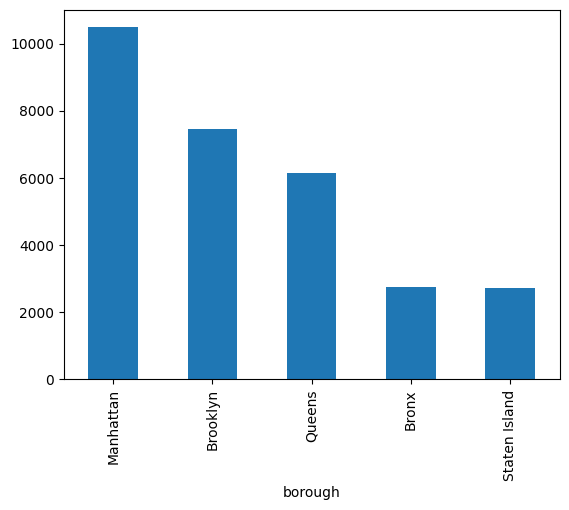

In [335]:
merged["borough"].value_counts().plot(kind = "bar");

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [338]:
file = pd.read_csv("/Users/anushasubramanian/Desktop/07-homework/02-dogs/boro_population.csv")
pop_df = pd.DataFrame(file)
pop_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


In [339]:
borough_dogs = pd.DataFrame(merged["borough"].value_counts().reset_index())
borough_dogs

,borough,count
0,Manhattan,10478
1,Brooklyn,7466
2,Queens,6154
3,Bronx,2748
4,Staten Island,2727


In [340]:
pop_dogs = borough_dogs.merge(pop_df, left_on = "borough", right_on='borough')
pop_dogs

,borough,count,population,area_sqmi
0,Manhattan,10478,1644518,23
1,Brooklyn,7466,2636735,71
2,Queens,6154,2339150,109
3,Bronx,2748,1455444,42
4,Staten Island,2727,474558,59


In [341]:
pop_dogs["per_capita"] = pop_dogs["count"]/pop_dogs["population"]
pop_dogs

,borough,count,population,area_sqmi,per_capita
0,Manhattan,10478,1644518,23,0.006371
1,Brooklyn,7466,2636735,71,0.002832
2,Queens,6154,2339150,109,0.002631
3,Bronx,2748,1455444,42,0.001888
4,Staten Island,2727,474558,59,0.005746


In [342]:
#Manhattan has the highest number of dogs per capita
pop_dogs.sort_values("per_capita", ascending = False).head(1)

,borough,count,population,area_sqmi,per_capita
0,Manhattan,10478,1644518,23,0.006371


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? This is very crazy, so ask in Slack, or a TA, or our buddy ChatGPT.

In [343]:
dog_breeds = merged.groupby(['borough', 'Primary Breed']).size().reset_index(name='counts')

#did not know you could use head() to do this...
sorted_breeds = dog_breeds.sort_values(['borough', 'counts'], ascending=[True, False]).groupby('borough').head(5)
sorted_breeds

,borough,Primary Breed,counts
145,Bronx,Yorkshire Terrier,250
128,Bronx,Shih Tzu,244
41,Bronx,Chihuahua,208
7,Bronx,American Pit Bull Terrier/Pit Bull,181
90,Bronx,Maltese,139
353,Brooklyn,Yorkshire Terrier,501
325,Brooklyn,Shih Tzu,481
198,Brooklyn,Chihuahua,391
262,Brooklyn,Labrador Retriever,255
267,Brooklyn,Maltese,247


In [344]:
#colors from https://matplotlib.org/stable/gallery/color/named_colors.html
borough_colors = {
    'Bronx': 'indianred',
    'Brooklyn': 'chocolate',
    'Manhattan': 'gold',
    'Queens': 'forestgreen',
    'Staten Island': 'lightblue'}

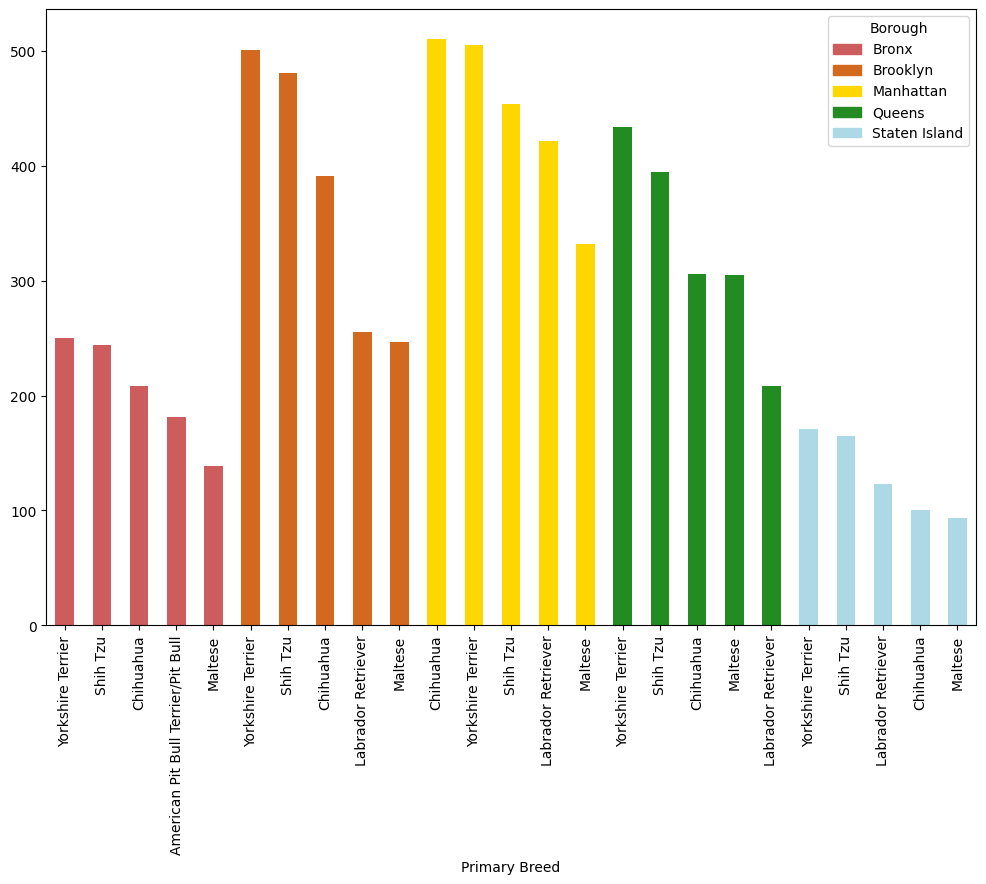

In [345]:
#used ChatGPT to get the legends and the colors but I swear I understand it.

ax = sorted_breeds.plot(
    x='Primary Breed',  
    y='counts',         
    kind='bar',         
    figsize=(12, 8),
    color=[borough_colors[borough] for borough in sorted_breeds['borough']]  # Assign colors by borough
)

# Add a legend for boroughs
ax.legend(handles=[plt.Rectangle((0, 0), 1, 1, color=color) for color in borough_colors.values()],
          labels=borough_colors.keys(),
          title='Borough', loc='upper right')
